In [1]:
import torch
import numpy as np
from torch import nn
from torch.autograd import Variable
import torch.nn.functional as F

import matplotlib.pyplot as plt
%matplotlib inline

from jupyterthemes import jtplot
jtplot.style()

In [21]:
from PIL import Image
im = Image.open('./cat.png').convert('L')
im = np.array(im, dtype="float32")
im.shape

(224, 224)

In [22]:
# plt.imshow(im.astype('uint8'), cmap='gray')
# 将图片矩阵转化为 pytorch tensor，并适配卷积输入的要求
im = torch.from_numpy(im.reshape((1, 1, im.shape[0], im.shape[1])))


tensor([[[[122., 122., 121.,  ...,  94.,  91.,  89.],
          [124., 124., 123.,  ...,  97.,  94.,  92.],
          [126., 126., 125.,  ..., 101.,  98.,  96.],
          ...,
          [161., 161., 161.,  ...,   0.,   0.,   0.],
          [160., 160., 161.,  ...,   0.,   0.,   0.],
          [160., 160., 160.,  ...,   0.,   0.,   0.]]]])

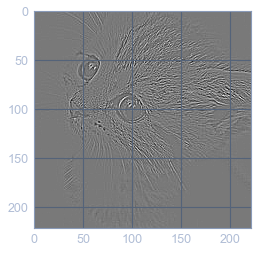

In [40]:
# 使用 nn.Conv2d
conv1 = nn.Conv2d(1, 1, 3, bias=False) # 定义卷积
sobel_kernel = np.array([[-1, -1, -1], 
                         [-1, 8, -1], 
                         [-1, -1, -1]], dtype='float32') # 定义轮廓检测算子
sobel_kernel = sobel_kernel.reshape((1, 1, 3, 3)) # 适配卷积的输入输出

conv1.weight.data = torch.from_numpy(sobel_kernel) # 给卷积的 kernel 赋值
edge1 = conv1(Variable(im)) 

edge1 = edge1.data.squeeze().numpy()
plt.imshow(edge1, cmap='gray')


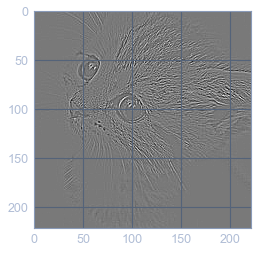

In [41]:
sobel_kernel = np.array([[-1, -1, -1], 
                         [-1, 8, -1], 
                         [-1, -1, -1]], dtype='float32') # 定义轮廓检测算子
sobel_kernel = sobel_kernel.reshape((1, 1, 3, 3)) # 适配卷积的输入输出
weight = Variable(torch.from_numpy(sobel_kernel))

edge1 = F.conv2d(Variable(im), weight)

edge1 = edge1.data.squeeze().numpy()
plt.imshow(edge1, cmap='gray')

before max pool, image shape: 224 x 224
after max pool, image shape: 112 x 112 


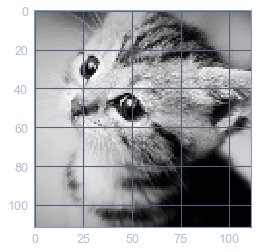

In [45]:
pool1 = nn.MaxPool2d(2, 2)
print('before max pool, image shape: {} x {}'.format(im.shape[2], im.shape[3]))
small_im1 = pool1(Variable(im))
small_im1 = small_im1.data.squeeze().numpy()
print('after max pool, image shape: {} x {} '.format(small_im1.shape[0], small_im1.shape[1]))
plt.imshow(small_im1, cmap="gray")

after max pool, image shape: 112 x 112 


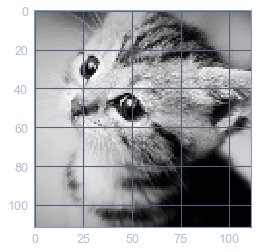

In [46]:
small_im2 = F.max_pool2d(Variable(im), 2, 2)
print('after max pool, image shape: {} x {} '.format(small_im1.shape[0], small_im1.shape[1]))
plt.imshow(small_im1, cmap="gray")

In [50]:
a = torch.randn(2, 4)
b = a.view_as(a)
print (a)
print (b)

tensor([[-0.1869, -0.4805,  0.7286, -0.5897],
        [ 1.5426,  1.6360,  0.7500, -0.2873]])
tensor([[-0.1869, -0.4805,  0.7286, -0.5897],
        [ 1.5426,  1.6360,  0.7500, -0.2873]])
